### Análisis de redes
##**PRÁCTICA SÍNTESIS :: Análisis de la Red de Conexiones en una Red Social**

Imagina que te has incorporado a una empresa que ha desarrollado una red social. Te han encargado investigar la estructura de la red de usuarios para entender mejor su conectividad, identificar los posibles *influencers* y detectar comunidades dentro de la red. Utilizaremos, como en otras ocasiones, **NetworkX** para llevar a cabo este análisis.


In [70]:
RANDOM_SEED = 42

**1. Creación del Grafo:**

Crea un grafo utilizando el modelo de [Erdős-Rényi](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) (incluido en Networkx) con 30 nodos y una probabilidad de conexión de 0.2.

*Nota: El modelo de Erdős-Rényi es uno de los modelos más simples y fundamentales en la teoría de grafos aleatorios. Se utiliza para generar grafos de manera probabilística y estudiar sus propiedades. Fue introducido por los matemáticos Paul Erdős y Alfréd Rényi en la década de 1950.*

In [71]:
import networkx as nx

G = nx.erdos_renyi_graph(30, .2, seed=RANDOM_SEED)

**2. Visualización del Grafo:**

Visualiza el grafo mediante el método "draw", mostrando etiquetas en los nodos. Asegúrate de que los nodos sean visibles y distinguibles.

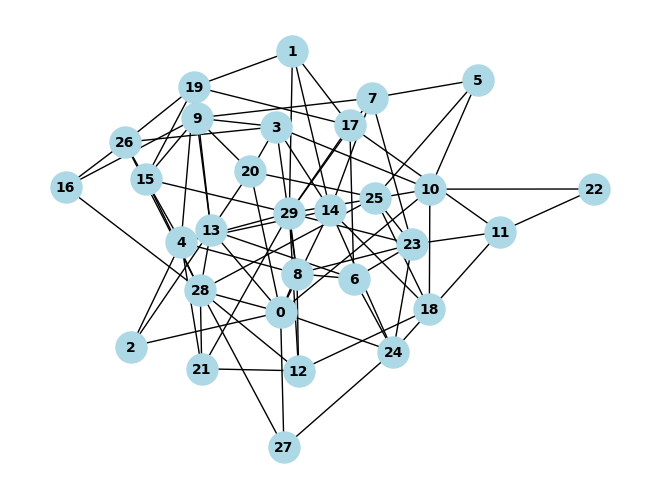

In [72]:
import matplotlib.pyplot as plt

# Visualización del Grafo

nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')

**3. Análisis de Conectividad:**

Determina cuántos componentes conectados tiene el grafo.
Si el grafo está conectado, calcula el diámetro del grafo. Si no lo es, indica cuál es el componente con mayor número de nodos y su diámetro.

In [73]:
# 4. Análisis de Conectividad

connected_components = nx.number_connected_components(G)
print(f"Número de Componentes Conectados: {connected_components}")

diameter = nx.diameter(G)
print(f"Diámetro del Grafo: {diameter}")

Número de Componentes Conectados: 1
Diámetro del Grafo: 4


**4. Detección de Comunidades:**

Utiliza el algoritmo de modularidad para detectar comunidades en el grafo.
Visualiza las comunidades detectadas coloreando los nodos según su comunidad.
Muestra cuántas comunidades se detectaron y cuántos nodos tiene cada comunidad.

In [74]:
from networkx.algorithms.community import greedy_modularity_communities

comunidades = list(greedy_modularity_communities(G))

print(f"Número de Comunidades Detectadas: {len(comunidades)}")

Número de Comunidades Detectadas: 6


Puedes usar el siguiente código (asegúrate de pasarle una lista con las comunidades) para visualizar las comunidades de forma diferenciada:

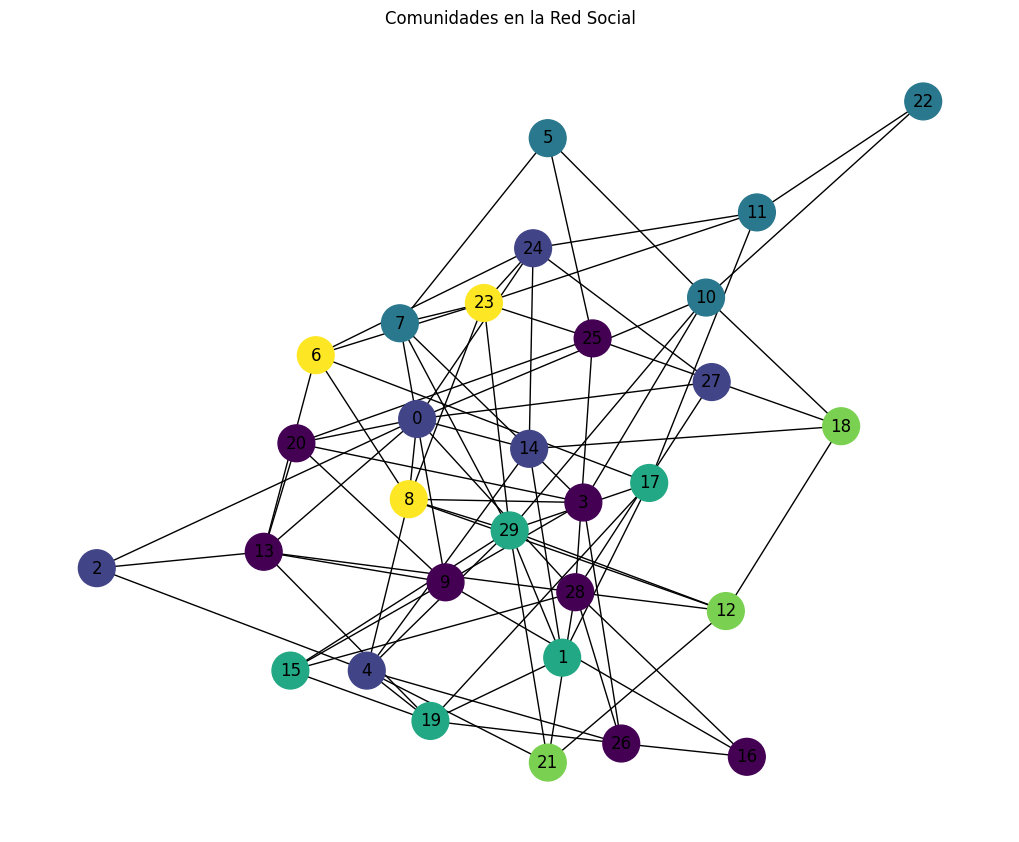

In [75]:
# Asignar colores a las comunidades
comunidad_mapa = {}
for i, comunidad in enumerate(comunidades):
    for nodo in comunidad:
        comunidad_mapa[nodo] = i

# Visualizar las comunidades
node_color = [comunidad_mapa[nodo] for nodo in G.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G, node_color=node_color, with_labels=True, node_size=700, cmap=plt.cm.viridis)
plt.title("Comunidades en la Red Social")
plt.show()

**5. Análisis de Centralidad:**

Una empresa de comnsultoría quiere identificar *influencers* dentro de la red social que pudieran ser útiles a otras empresas para desarrollar campañas de marketing de sus productos. Sugiere desde el mismo código qué usuario(s) pueden ser *influencers* en la red social.

Estrategias de análisis de la red:
1. Calcula la centralidad de grado para cada nodo y muestra los 5 nodos con mayor
centralidad de grado.
2. Calcula la centralidad de intermediación para cada nodo y muestra los 5 nodos con mayor centralidad de intermediación.
3. Calcula la centralidad de cercanía para cada nodo y muestra los 5 nodos con mayor centralidad de cercanía.

In [76]:
import pandas as pd

# Análisis de Centralidad


# Mostrar los 5 nodos con mayor centralidad de grado
degree_centrality = nx.degree_centrality(G)
degree_top_5 = [f"{key} ({value:.2f})" for key, value in
                sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]]

# Mostrar los 5 nodos con mayor centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_top_5 = [f"{key} ({value:.2f})" for key, value in
                     sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]]

# Mostrar los 5 nodos con mayor centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G)
closeness_top_5 = [f"{key} ({value:.2f})" for key, value in
                   sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]]

result_df = pd.DataFrame({
    'Degree centrality': degree_top_5,
    'Closeness centrality': closeness_top_5,
    'Betweeness centrality': betweenness_top_5,
})
result_df


,Degree centrality,Closeness centrality,Betweeness centrality
0,29 (0.34),0 (0.58),29 (0.13)
1,0 (0.31),29 (0.56),28 (0.11)
2,28 (0.31),8 (0.54),0 (0.10)
3,4 (0.24),14 (0.54),10 (0.09)
4,8 (0.24),28 (0.54),14 (0.07)


**Preguntas para Reflexionar:**


---


### 1.   ¿Qué diferencias observas entre los nodos más influyentes según las diferentes medidas de centralidad?


**Respuesta**:

Cada algoritmo de centralidad mide un aspecto diferente del grafo a la hora de calcular la centralidad. Esto resulta en resultados diferentes, si bien es cierto que los tres algoritmos colocan a los nodos (29, 28 y 0) en el top 5 de nodos más influyentes, no lo hacen en el mismo orden ni con la misma relevancia.

### 2.   ¿Cómo afecta la probabilidad de "estar conectado" **'p'** en la creación del grafo a la conectividad y el diámetro?


**Respuesta**:

Al aumentar la probabilidad de estar conectado 'p' al crear el grafo esto genera un grafo con más enlaces. Al obtener un grafo con más enlaces la conectividad del grafo aumenta, ya que es más probable que existan caminos entre los nodos. Del mismo modo, al existir un mayor número de enlaces, el diámetro del grafo será menor, puesto que, de forma general, se podrá viajar entre nodos con menos saltos intermedios

### 3.   ¿Qué podrías inferir sobre la estructura de una red social real basada en los resultados obtenidos de este grafo simulado?

**Respuesta:**

A partir de los resultados obtenidos del grafo simulados podemos ver como las redes sociales tienen nodos más importantes, los cuales enlazan con una gran cantidad de nodos (los denominados "influencers"). También podemos ver como dentro de una red social existen diferentes comunidades, las cuales nos indican que existen nodos que tienen intereses en común